# 인공 신경망

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/7-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [3]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 패션 MNIST

In [4]:
from tensorflow import keras

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [6]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


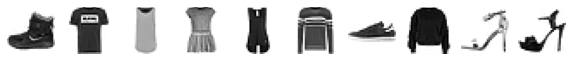

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [8]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [9]:
import numpy as np

print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


## 로지스틱 회귀로 패션 아이템 분류하기

In [10]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [11]:
print(train_scaled.shape)

(60000, 784)


In [12]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

# 사이킷런 1.1 버전에서는 SGDClassifier의 loss 매개변수 중 
# 로지스틱 손실을 의미하는 'log'가 'log_loss'로 바뀐다는 경고가 발생합니다.
# 사이킷런 1.1 이상을 사용하는 경우 loss='log'를 loss='log_loss'로 변경하세요.
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)

scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasin

0.8196000000000001


/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## 인공신경망

### 텐서플로와 케라스

In [13]:
import tensorflow as tf

In [14]:
from tensorflow import keras

## 인공신경망으로 모델 만들기

In [15]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [16]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [17]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [18]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [19]:
model = keras.Sequential(dense)

2022-05-19 01:03:35.014394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## 인공신경망으로 패션 아이템 분류하기

In [20]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [21]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [22]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6058 - accuracy: 0.7932
Epoch 2/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4785 - accuracy: 0.8385
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4564 - accuracy: 0.8471
Epoch 4/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4435 - accuracy: 0.8539
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4358 - accuracy: 0.8551


In [23]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4579 - accuracy: 0.8483


[0.45794257521629333, 0.8483333587646484]